In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9642ae2d477899f113cd8dd08bea37c


In [32]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9642ae2d477899f113cd8dd08bea37c&q=Boston


In [33]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [34]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 39.07,
  'feels_like': 33.44,
  'temp_min': 37,
  'temp_max': 42.01,
  'pressure': 1021,
  'humidity': 28},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 320},
 'clouds': {'all': 0},
 'dt': 1617498986,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1617445361,
  'sunset': 1617491508},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [35]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [36]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9642ae2d477899f113cd8dd08bea37c&q=Boston


In [37]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 39.07,
  'feels_like': 33.44,
  'temp_min': 37,
  'temp_max': 42.01,
  'pressure': 1021,
  'humidity': 28},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 320},
 'clouds': {'all': 0},
 'dt': 1617498986,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1617445361,
  'sunset': 1617491508},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [38]:
# Get the JSON data.
boston_data = city_weather.json()

In [39]:
boston_data['sys']

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1617445361,
 'sunset': 1617491508}

In [40]:
boston_data["sys"]["country"]

'US'

In [41]:
boston_data["dt"]

1617498986

In [42]:
boston_data["coord"]["lat"]

42.3584

In [43]:
boston_data["main"]["temp_max"]

42.01

In [44]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 42.01 28 0 8.05


In [45]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 4, 4, 1, 16, 26)

In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bosaso
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | jalingo
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | deer lake
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | san borja
Processing Record 16 of Set 1 | pueblo nuevo
Processing Record 17 of Set 1 | manggar
Processing Record 18 of Set 1 | beisfjord
Processing Record 19 of Set 1 | gubkinskiy
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of

In [49]:
len(city_data)

526

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["column2", "column4", "column1"]
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
1,Jamestown,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
2,Rikitea,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
3,Bosaso,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
4,Bambous Virieux,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
5,Jalingo,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
6,Cape Town,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
7,Mataura,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
8,Broken Hill,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
9,Punta Arenas,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

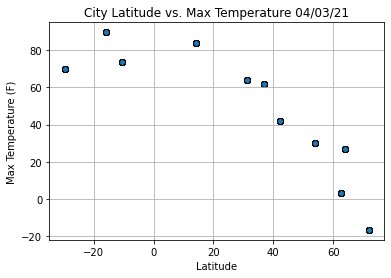

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

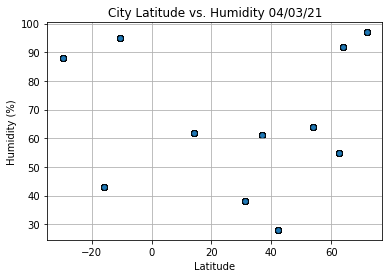

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

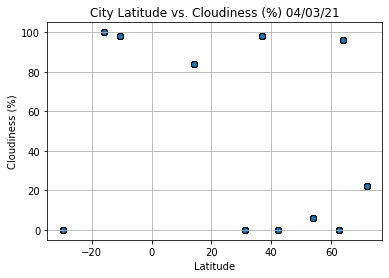

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

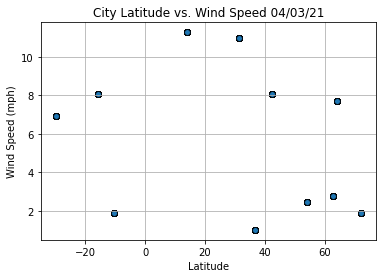

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                       42.3584
Lng                      -71.0598
Max Temp                    42.01
Humidity                       28
Cloudiness                      0
Wind Speed                   8.05
Country                        US
Date          2021-04-04 01:16:26
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
521    False
522    False
523    False
524    False
525    False
Name: Lat, Length: 526, dtype: bool

In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
1,Jamestown,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
2,Rikitea,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
3,Bosaso,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26
4,Bambous Virieux,42.3584,-71.0598,42.01,28,0,8.05,US,2021-04-04 01:16:26


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

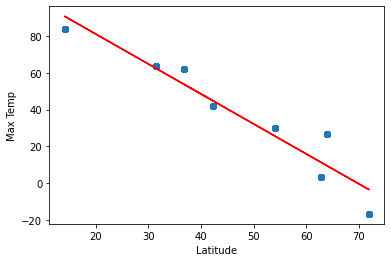

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

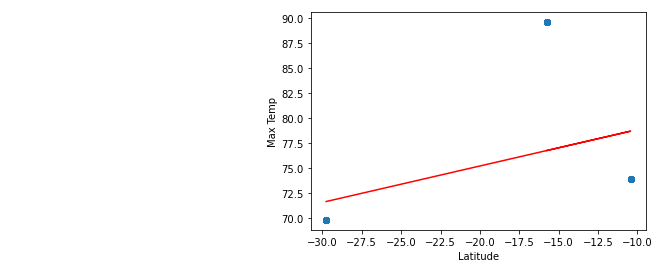

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

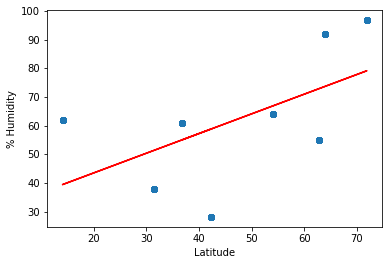

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

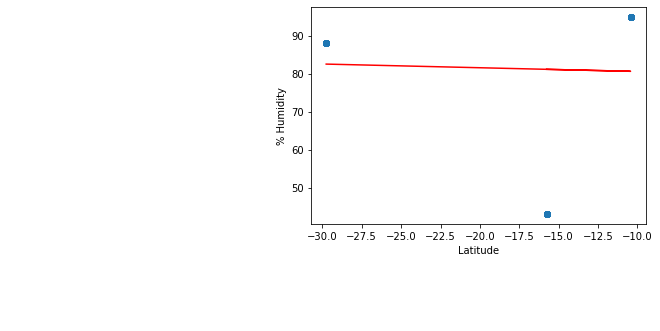

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

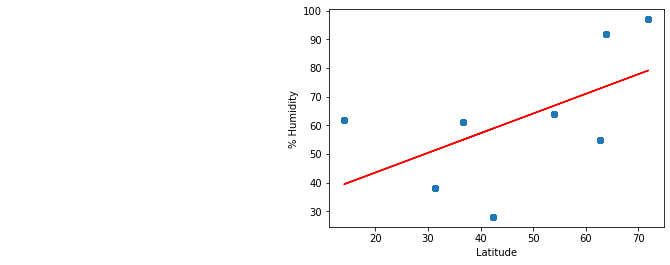

In [73]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(-50,15))

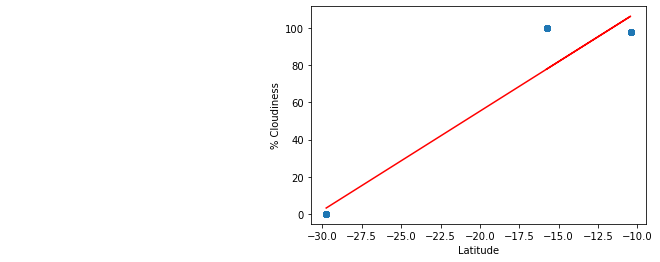

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness','% Cloudiness',(-50,60))

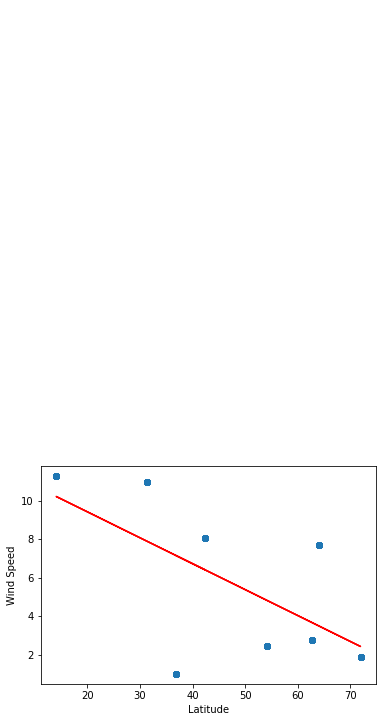

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere in for Wind Speed', 'Wind Speed',(40,35))

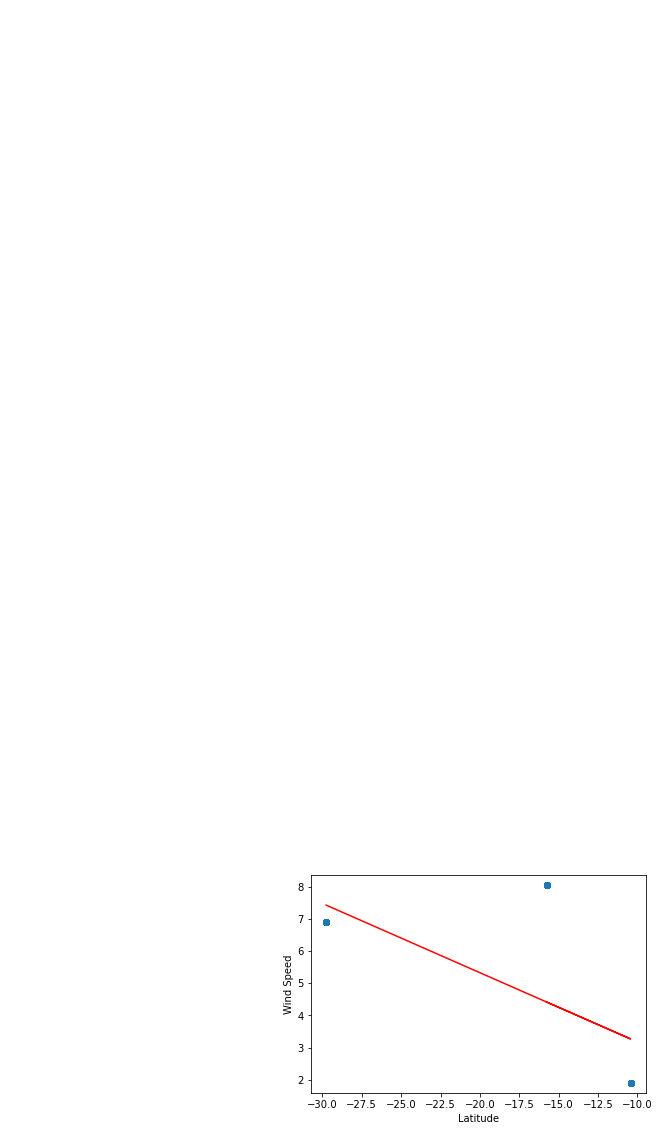

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))